# Bonus Problem 6

In Chapter 13.1 to Chapter 13.2.3 in A. Beck (2017), the Generalized Conditional Gradient Method is described as a way of solving composite problems with the structure:

\begin{align*}
    \text{min}\{ F(x) \equiv f(x) + g(x) \}
\end{align*}

Where the following assumptions are made on $f$ and $g$:  

\begin{align}
    & g: E -> (-\infty, \infty] \text{ is proper closed convex and $dom(g)$ is compact.} \\
    & f: E -> (-\infty, \infty] \text{ is $L_f$-smooth over $dom(f)$ with $L_f > 0$} \\
    & \text{ $dom(f)$ is an open convex set with: $dom(g) \subseteq dom(f)$}
\end{align}

In the Generalized Conditional Gradient Method the starting point $x_0$ needs to fulfill: $x_0 \in dom(g)$, and an iteration is done by computing the following calculations: 

$p_k = p(x_k)$ is chosen among: 

\begin{align*}
    p_k = p(x_k) \in \underset{p \in E}{\text{argmin}} \{ p \cdot ∇f(x_k) + g(p) \}
\end{align*}

And then $t_k$ is chosen $t_k \in [0, 1]$ and:

\begin{align*}
    x_{k+1} = x_k + t_k(p_k − x_k)
\end{align*}

The definition for the conditional gradient norm $S(x)$ is defined in the book as follows: 

\begin{align*}
    S(x) \equiv \nabla f(x) \cdot (x - p(x)) + g(x) - g(p(x))
\end{align*}

When optimizing over the unit ball as follows: 

\begin{equation*}
    minimize\{ f(x): ||x||_2 \leq 1 \}
\end{equation*}

We can put $g(x) = \delta_{||.|| [0, 1]}(x)$ where: 

\begin{align*}
    \delta_{||.|| [0, 1]}(x) = 
    \begin{cases}
        0, & ||x||_2 \leq 1 \\
        \infty, & \text{otherwise}
    \end{cases}
\end{align*}

And the expression for $p$ becomes: 

\begin{align*}
    &p(x) \in \underset{p \in E}{\text{argmin}} \{ p \cdot ∇f(x) + g(p) \} \iff \\
    &p(x) \in \underset{p: ||p||_2 \leq 1}{\text{argmin}} \{ p \cdot ∇f(x) \}
\end{align*}

Which gives an expression for $p(x)$ as:

\begin{equation*}
    p(x) = 
    \begin{cases}
        -\frac{\nabla f(x)}{||\nabla f(x)||_2} , & \nabla f(x) \neq 0 \\
        0 , & \nabla f(x) = 0
    \end{cases}
\end{equation*}

This in turn gives the following expression for the conditional gradient norm for any $x \in dom(g)$:

\begin{align*}
    S(x) & = \nabla f(x) \cdot x - \nabla f(x) \cdot p(x) \\
        & = \nabla f(x) \cdot x - \nabla f(x) \cdot -\frac{\nabla f(x)}{||\nabla f(x)||_2} \\
        & = \nabla f(x) \cdot x + || \nabla f(x) ||_2
\end{align*}



Our problem is the following: 

\begin{align*}
    & \underset{x \in \mathbb{R}^n}{\text{maximize}} \left\{ \frac{1}{2} x^T A x \right\} \\
    & \text{subject to: }  ||x||_2 \leq 1 
\end{align*}

With $A \in \mathbb{S}^n_+$. This can be reformulated as: 

\begin{align*}
    & \underset{x \in \mathbb{R}^n: ||x||_2 \leq 1}{\text{minimize}} \left\{ f(x) \right\} \\
\end{align*}

where $f(x) = -\frac{1}{2} x^T A x $. We note that: $\nabla f (x) = - A x $

Since this is an optimization problem over the unit ball, we can use the previously derived expression for $p(x)$. This results in the following update formula for $x_k$ using the conditional gradient method:

\begin{equation*}
    x_{k+1} = (1-t_k)x_k + t_k \frac{A x_k}{ ||A x_k ||_2 }
\end{equation*}

Where $t_k \in [0, 1]$ is the stepsize. Using an exact line search strategy implies choosing $t_k$ such that: 

\begin{equation*}
    t_k \in \text{argmin}_{t \in [0, 1]} f(x_k + t(p(x_k) - x_k)) 
\end{equation*}

Which gives $t_k = 1$ for all non-stationary points $x_k$ since f is concave. This gives the final update rule for the conditional gradient method applied on this problem with an exact line search: 

\begin{equation*}
    x_{k+1} = \frac{A x_k}{ ||A x_k ||_2 }
\end{equation*}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Data specification: 
n = 1000

# Generating a random positive semidefinite matrix A: 
P = np.random.randn(n, n)
A = P.T @ P

# Generating a random initial point x0 with unit 2-norm (length 1):
x0 = np.random.randn(n)
x0 = x0/np.linalg.norm(x0, 2)

In [22]:
def F(A, x):
    if not is_in_area(x):
        return np.inf
    return -0.5 * x.T @ A @ x

def grad_F(A, x):
    return -A @ x

def is_in_area(x):
    return np.linalg.norm(x, 2) <= 1

def S(A, x):
    grad_F_x = grad_F(A, x)
    return np.dot(grad_F_x, x) + np.linalg.norm(grad_F_x, 2)

def power_method(A, x0, max_iter=1000):
    x_cur = x0
    
    best_conditional_grad_norm = S(A, x_cur)
    conditional_grad_norms = [best_conditional_grad_norm]
    best_conditional_grad_norms = [best_conditional_grad_norm]

    for _t in range(max_iter):
        A_x_cur = A @ x_cur
        x_next = A_x_cur / np.linalg.norm(A_x_cur, 2)
        
        x_cur = x_next

        # Storing the results for plotting: 
        conditional_grad_norm = S(A, x_cur)

        if conditional_grad_norm < best_conditional_grad_norm:
            best_conditional_grad_norm = conditional_grad_norm
        
        conditional_grad_norms.append(conditional_grad_norm)
        best_conditional_grad_norms.append(best_conditional_grad_norm)       

    return conditional_grad_norms, best_conditional_grad_norms, x_cur

In [26]:
conditional_grad_norms, best_conditional_grad_norms, x_star = power_method(A, x0, 1000)

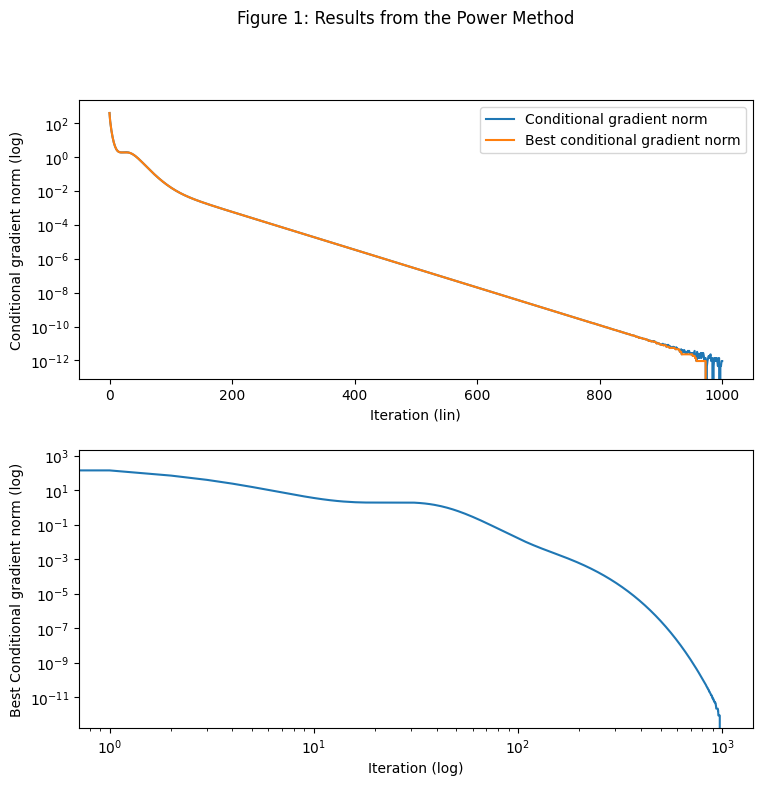

In [27]:
# Plotting the results:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.suptitle('Figure 1: Results from the Power Method')

plt.tight_layout(pad=3.0)
axs[0].plot(conditional_grad_norms, label='Conditional gradient norm')
axs[0].plot(best_conditional_grad_norms, label='Best conditional gradient norm')
axs[0].legend()
axs[0].set_xlabel('Iteration (lin)')
axs[0].set_ylabel('Conditional gradient norm (log)')
axs[0].set_yscale('log')

axs[1].plot(best_conditional_grad_norms)
axs[1].set_xlabel('Iteration (log)')
axs[1].set_xscale('log')
axs[1].set_ylabel('Best Conditional gradient norm (log)')
axs[1].set_yscale('log')

In [25]:
print(is_in_area(x_star))

True


# Theory:

In A. Beck (2017), the theorem Theorem 13.9 is stated, the following is a subset of this theorem, which will be referred as Theorem 1 here.

Theorem 1:

If the assumptions in (1-3) holds, and a sequence generated by the generalized conditional gradient method $\{x_k\}_{k \geq 0}$ with stepsizes selected by an exact line search strategy, the following holds: 

- (a) for any $k \geq 0, F(x_{k+1} \leq F(x_k))$ with strict inequality if $x_k$ is not a stationary point. 

- (b) $S(x_k) -> 0$ as $k -> \infty$

- (c) for any $k \geq 0$, 

\begin{equation*}
    min_{n=1, ... , k} S(x_n) \leq max\left\{ \frac{2(F(x_0) - F_{opt})}{k+1}, \frac{\sqrt{2 L_f \Omega^2 (F(x_0) - F_{opt})}}{\sqrt{k+1}} \right\}
\end{equation*}

where $\Omega$ is an upper bound on the diameter of $dom(g)$

- (d) all limit points of the sequence $\{ x_k \}_{k \geq 0}$ are stationary points of the problem.

# Discussion

The results seem to align well with the theorem bla bla bla... 